In [2]:
from neural_implementation import neural_classification as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# UCITAVANJE PODATAKA I TESTIRANJE

df = pd.read_csv('./datasets/iris_extended.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
N = df.shape[0]
print(f'Ukupan broj podataka: {N}')

m = df.shape[1] - 1
print(f'Broj atributa svakog podatka: {m}')

attributes = list(df.drop('variety', axis=True).columns)
print(f'Atributi: {attributes}')

Ukupan broj podataka: 250
Broj atributa svakog podatka: 4
Atributi: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


In [6]:
attr1 = 'petal.length'
attr2 = 'petal.width'
attributes = [attr1, attr2]
m = len(attributes)

N = df.shape[0]
print(f'Velicina skupa podataka: {N}')

Velicina skupa podataka: 250


In [7]:
classes = df['variety'].unique()
n_classes = len(classes)

print(f'Klase: {classes}')
print(f'Broj klasa: {n_classes}\n')

name_to_class_dict = dict(zip(classes, range(n_classes)))
class_to_name_dict = dict(zip(range(n_classes), classes))

print(f'Mapiranje imena klasa u numericke vrednosti:')
for name, cls in name_to_class_dict.items():
    print(f'{name} -> {cls}')

print()
print(f'Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:')
for cls, name in class_to_name_dict.items():
    print(f'{cls} -> {name}')

Klase: ['Setosa' 'Versicolor' 'Virginica' 'Letosa' 'Helenica']
Broj klasa: 5

Mapiranje imena klasa u numericke vrednosti:
Setosa -> 0
Versicolor -> 1
Virginica -> 2
Letosa -> 3
Helenica -> 4

Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:
0 -> Setosa
1 -> Versicolor
2 -> Virginica
3 -> Letosa
4 -> Helenica


In [8]:
mapper_cls_to_vec = {}
for i in range(n_classes):
    vec = np.zeros((n_classes,))
    vec[i] = 1
    
    mapper_cls_to_vec[i] = vec
    
print('Mapiranje numericke vrednosti u odgovarajuci vektor:')
for cls, vec in mapper_cls_to_vec.items():
    print(f'{cls} -> {vec}')

Mapiranje numericke vrednosti u odgovarajuci vektor:
0 -> [1. 0. 0. 0. 0.]
1 -> [0. 1. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0.]
3 -> [0. 0. 0. 1. 0.]
4 -> [0. 0. 0. 0. 1.]


In [9]:
y_tmp = df['variety']

y = np.zeros((N, n_classes))
for i in range(N):
    cls = name_to_class_dict[y_tmp[i]]
    y[i] = mapper_cls_to_vec[cls]

In [10]:
X = np.ones((N, m + 1))
X[:, 1] = df[attr1]
X[:, 2] = df[attr2]
# X[:, 3] = df[attr1]**2
# X[:, 4] = df[attr2]**2

In [11]:
print(f'Podaci:')
print(X[:10])
print(' ...')

print(f'Ciljne promenljive:')
print(y[:10])
print(' ...')

Podaci:
[[1.  1.4 0.2]
 [1.  1.4 0.2]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.7 0.4]
 [1.  1.4 0.3]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.5 0.1]]
 ...
Ciljne promenljive:
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
 ...


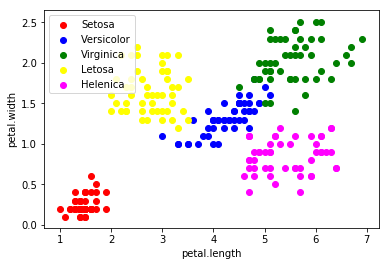

In [12]:
colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.3, 
                                                    random_state=5)

In [14]:
print(f'X_train:')
print(X_train[:10])
print(' ...')
print()

print(f'y_train:')
print(y_train[:10])
print(' ...')
print()

print(f'X_test:')
print(X_test[:10])
print(' ...')
print()

print(f'y_test:')
print(y_test[:10])
print(' ...')

X_train:
[[1.  4.7 1.6]
 [1.  6.4 2. ]
 [1.  2.7 1.7]
 [1.  5.6 0.7]
 [1.  2.9 1.6]
 [1.  1.3 0.2]
 [1.  1.5 0.4]
 [1.  4.7 1.1]
 [1.  4.3 1.3]
 [1.  3.  1.3]]
 ...

y_train:
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
 ...

X_test:
[[1.  1.3 0.3]
 [1.  5.1 1. ]
 [1.  1.5 0.2]
 [1.  5.2 0.5]
 [1.  5.4 0.7]
 [1.  4.8 0.6]
 [1.  3.5 1. ]
 [1.  5.8 1.6]
 [1.  5.3 1.9]
 [1.  3.2 1.6]]
 ...

y_test:
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]
 ...


In [15]:
neural_networks = [
    nc.NeuralNetwork(m, [m], n_classes),
    nc.NeuralNetwork(m, [m, m], n_classes),
    nc.NeuralNetwork(m, [m, m, m], n_classes),
    nc.NeuralNetwork(m, [2*m], n_classes),
    nc.NeuralNetwork(m, [2*m, m], n_classes),
    nc.NeuralNetwork(m, [2*m, 2*m], n_classes),
    nc.NeuralNetwork(m, [3*m], n_classes),
    nc.NeuralNetwork(m, [3*m, m], n_classes),
    nc.NeuralNetwork(m, [3*m, 3*m], n_classes),
    nc.NeuralNetwork(m, [3*m, 3*m, 3*m], n_classes)
]

In [16]:
lambdas = [0] + [0.01 * (1.5**i) for i in range(8)]
print('lamda parameters:')
print(lambdas)

lamda parameters:
[0, 0.01, 0.015, 0.0225, 0.03375, 0.050625, 0.0759375, 0.11390625, 0.170859375]


In [17]:
# Kljuc recnika ce biti indeks neuralne mreze kojoj odgovara klasifikator,
# a vrednost lista klasifikatora (modela) za razlicite parametre lambda
nn_classifiers = {}
for i, nn in enumerate(neural_networks):
    nn_classifiers[i] = [nn.fit(X_train, 
                             y_train, 
                             alpha=0.01, 
                             lambda_param=lambda_param,
                             gc_it=100,
                             gc_log_path=f'gc_log_{i}_{round(lambda_param, 3)}.txt') 
                      for lambda_param in lambdas]

In [18]:
nn_classifier_losses = {}
for nn_index, nn_clfs in nn_classifiers.items():
    nn_classifier_losses[nn_index] = [clf.loss(X_test, y_test) for clf in nn_clfs]

print('Funkcije gubitka za svaki klasifikator posebno na test skupu:')
print('###############################################################')
for nn_index, clfs in nn_classifiers.items():
    print(f'Greske neuralne mreze {nn_index} (slojevi: {neural_networks[nn_index].layer_sizes}):')
    
    for i, loss in enumerate(nn_classifier_losses[nn_index]):
        print(f'\t* Loss{i + 1} = {loss}')
        
    print()


Funkcije gubitka za svaki klasifikator posebno na test skupu:
###############################################################
Greske neuralne mreze 0 (slojevi: [2, 2, 5]):
	* Loss1 = 2.4853001872646434
	* Loss2 = 2.4896633613435784
	* Loss3 = 2.4923908287400205
	* Loss4 = 2.495108038274419
	* Loss5 = 2.4912848494401834
	* Loss6 = 2.4965522533448667
	* Loss7 = 2.49657660656543
	* Loss8 = 2.503322092651034
	* Loss9 = 2.50964770307596

Greske neuralne mreze 1 (slojevi: [2, 2, 2, 5]):
	* Loss1 = 3.7318680350629228
	* Loss2 = 3.5139108064539943
	* Loss3 = 3.5593919034781583
	* Loss4 = 3.581863401385041
	* Loss5 = 3.4613998412237597
	* Loss6 = 3.63417178011646
	* Loss7 = 3.5758821192451773
	* Loss8 = 3.6359430160105726
	* Loss9 = 3.5212555124628935

Greske neuralne mreze 2 (slojevi: [2, 2, 2, 2, 5]):
	* Loss1 = 3.546893568168851
	* Loss2 = 3.455127062548287
	* Loss3 = 3.5500145074827856
	* Loss4 = 3.4747054000792255
	* Loss5 = 3.5059858736311584
	* Loss6 = 3.6055554875802347
	* Loss7 = 3.560

In [22]:
min_loss = float('inf')
nn_index_best = 0
clf_index_best = 0

for nn_index, losses in nn_classifier_losses.items():
    for i, loss in enumerate(losses):
        if min_loss > loss:
            min_loss = loss
            nn_index_best = nn_index
            clf_index_best = i
            
best_clf = nn_classifiers[nn_index_best][clf_index_best]
        
print(f'Najmanji gubitak (na test skupu) za svaki klasifikator: {min_loss}')    
print(f'Mreza za koju je istreniran najbolji klasifikator: '
      f'\n\tIndeks: {nn_index_best}\n\tslojevi: {neural_networks[nn_index_best].layer_sizes}')
print('Model najboljeg klasifikatora:')

best_clf.print_model()

Najmanji gubitak (na test skupu) za svaki klasifikator: 2.4756237864684265
Mreza za koju je istreniran najbolji klasifikator: 
	Indeks: 6
	slojevi: [2, 6, 5]
Model najboljeg klasifikatora:
Model:
W_0: 0 -> 1
[[-0.04240668 -0.14703178 -0.0078024 ]
 [ 0.12203233  0.34207889  0.05016616]
 [ 0.04311149  0.26669382  0.16788858]
 [ 0.04384077  0.25216804  0.06165955]
 [-0.0133684   0.25656534  0.05200348]
 [ 0.13491516  0.10922912  0.02327104]]
W_1: 1 -> 2
[[-0.21749809  0.01658558 -0.45899812 -0.42436926 -0.34590371 -0.29648532
  -0.24957064]
 [-0.43965281 -0.23018133 -0.27569096 -0.21121279 -0.19016987 -0.26710156
  -0.16801954]
 [-0.50157487 -0.33065517 -0.22261343 -0.20022061 -0.11282543 -0.13118507
  -0.24186248]
 [-0.40071118 -0.07294924 -0.35628073 -0.22072571 -0.27667806 -0.30948334
  -0.17322351]
 [-0.53921552 -0.1921872  -0.28116731 -0.14205662 -0.11911993 -0.1981574
  -0.21080616]]


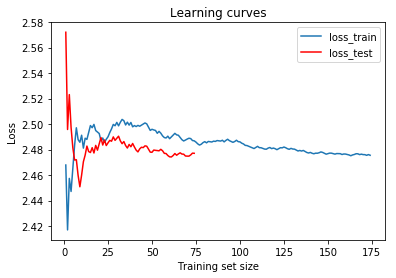

In [23]:
nc.plot_learning_curves(X_train, y_train, X_test, y_test, best_clf)

Ponovno iscrtavanje skupa podataka pred testiranje:


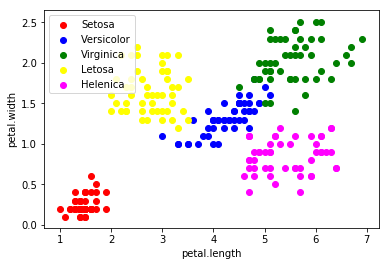

In [24]:
print('Ponovno iscrtavanje skupa podataka pred testiranje:')

colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)

plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [25]:
x1 = np.array([1, 0.5, 0.4]) # Setosa
x2 = np.array([1, 4.2, 1.2]) # Versicolor
x3 = np.array([1, 5.5, 2]) # Virginca
x4 = np.array([1, 2.9, 1.9]) # Letosa
x5 = np.array([1, 5.2, 0.8]) # Helenica

In [28]:
nn_best = neural_networks[nn_index_best]
nn_best.set_model(best_clf.model)

y1 = nn_best.predict(x1)
print(y1)

y2 = nn_best.predict(x2)
print(y2)

y3 = nn_best.predict(x3)
print(y3)

y4 = nn_best.predict(x4)
print(y4)

y5 = nn_best.predict(x5)
print(y5)

[0.2420722  0.24404143 0.24866745 0.24239734 0.24931727]
[0.21662545 0.22717425 0.23393385 0.22214828 0.23276785]
[0.2083616  0.22157699 0.22899993 0.21550546 0.2272375 ]
[0.22294629 0.23146718 0.23773303 0.22727209 0.23696343]
[0.21186315 0.22391841 0.23104511 0.2182794  0.22957554]


In [26]:
y_predict1 = best_clf.predict(x1)
y_predict2 = best_clf.predict(x2)
y_predict3 = best_clf.predict(x3)
y_predict4 = best_clf.predict(x4)
y_predict5 = best_clf.predict(x5)

print('~ TESTIRANJE KLASIFIKATORA ~')

print('Test 1:')
nc.Classifier.prediction_info(y_predict1, class_to_name_dict)
print()

print('Test 2:')
nc.Classifier.prediction_info(y_predict2, class_to_name_dict)
print()

print('Test 3:')
nc.Classifier.prediction_info(y_predict3, class_to_name_dict)
print()

print('Test 4:')
nc.Classifier.prediction_info(y_predict4, class_to_name_dict)
print()

print('Test 5:')
nc.Classifier.prediction_info(y_predict5, class_to_name_dict)
print() 

~ TESTIRANJE KLASIFIKATORA ~
Test 1:
Prediction vector: [0.23184799 0.23779582 0.23816863 0.23563892 0.23891698]
Max prediction value: 0.2389169752347931 (at position 4)
Class: Helenica

Test 2:
Prediction vector: [0.17027384 0.202242   0.21391191 0.18900128 0.2091625 ]
Max prediction value: 0.2139119087466922 (at position 2)
Class: Virginica

Test 3:
Prediction vector: [0.15611256 0.19362651 0.20798149 0.17787226 0.20190793]
Max prediction value: 0.20798149262420276 (at position 2)
Class: Virginica

Test 4:
Prediction vector: [0.1835053  0.21000009 0.2188527  0.19950477 0.21584215]
Max prediction value: 0.21885269590535864 (at position 2)
Class: Virginica

Test 5:
Prediction vector: [0.16159227 0.19710062 0.21062155 0.18208118 0.20475055]
Max prediction value: 0.21062155441042762 (at position 2)
Class: Virginica

